In [1]:
# Import data (mostly used when using colab)


In [17]:
import torch
import numpy as np
import pydicom
from dbimage_torch import DBImage
import matplotlib.pyplot as plt
import csv
from os import listdir


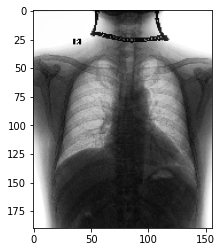

In [18]:
# Load training data
single_data = pydicom.dcmread("data/chest_data_0.dicom")
down_sample = 15

single_data_arr = torch.from_numpy(single_data.pixel_array.astype(np.float))
single_data_arr = single_data_arr/torch.max(single_data_arr)
single_data_arr = single_data_arr[::down_sample,::down_sample].clone()
#print(single_data_arr[0,:])

plt.imshow(single_data_arr, cmap="gray")

torch.save(single_data_arr,"data/sample_chest_0.pt")

In [29]:
# load meta data

meta_id = []
meta_label = []
with open("chest_meta.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        if "class_id" in row:
            pass
        else:
            meta_id.append(row[0])
            meta_label.append(row[2])
        
#print(meta_id[:6])
#print(meta_label[:6])

my_dict = {}
for i in meta_id:
    my_dict[i] = []
for i in range(len(meta_id)):
    my_dict[meta_id[i]].append(meta_label[i])
    
print(my_dict["0007d316f756b3fa0baea2ff514ce945"])
for i in range(len(meta_id)):
    lbs = [0 for j in range(15)]
    dummy = list(set(my_dict[meta_id[i]]))
    if i < 3:
        print(dummy)
    for k in dummy:
        lbs[int(k)] = 1
        if i < 3:
            print(k)
            print(lbs)
    my_dict[meta_id[i]] = lbs
    if i < 3:
        print(my_dict[meta_id[i]])
        
print(my_dict["0007d316f756b3fa0baea2ff514ce945"])
    




['13', '11', '3', '11', '13', '0', '5', '5', '0', '11', '13']
['14']
14
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
['14']
14
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
['10', '3', '0', '11']
10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
3
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
0
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
11
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
# GEt images and save them

list_of_dicom_filenames = listdir("data/chest_data_dirty")


print(list_of_dicom_filenames)
print(my_dict[list_of_dicom_filenames[2][:-6]])

# Match image with label

for i in list_of_dicom_filenames:
    if i == ".DS_Store":
        pass
    else:
        img = torch.from_numpy(pydicom.dcmread("data/chest_data_dirty/"+i).pixel_array.astype(np.float))
        lb = my_dict[i[:-6]]
        torch.save(img,"data/chest_data/"+i[:-6]+"_X.pt")
        torch.save(lb, "data/chest_data/labels/"+i[:-6]+"_lb.pt")


['0007d316f756b3fa0baea2ff514ce945.dicom', '.DS_Store', '00053190460d56c53cc3e57321387478.dicom', '000ae00eb3942d27e0b97903dd563a6e.dicom', '0006e0a85696f6bb578e84fafa9a5607.dicom', '0005e8e3701dfb1dd93d53e2ff537b6e.dicom']
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0007d316f756b3fa0baea2ff514ce945_X.pt
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


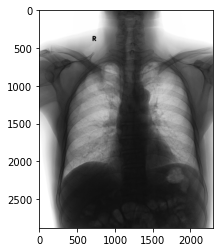

In [21]:
path = "data/chest_data/"
list_of_img_filenames = listdir("data/chest_data")
def load_img(filename):
    if filename == ".DS_Store" or filename=="labels":
        img, lb = False, False
        pass
    else:
        img = torch.load(path+filename)
        lb = torch.load(path + "/labels/"+filename[:-4] + "lb.pt")

    return img, lb

img, lb = load_img(list_of_img_filenames[6])
print(my_dict["0007d316f756b3fa0baea2ff514ce945"])
print(list_of_img_filenames[6])
print(lb)
plt.imshow(img,cmap="gray")
